# Import Library

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import os
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [28]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


# Data Cleansing

Checking Data Types and to see if the columns pulled in correctly

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Cleaning up extra spacing in columns names

In [30]:
df.columns = df.columns.str.replace(' ','')

Changing Income field to Numerical

In [31]:
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','').astype('float')

Ensuring numerical Income field popluated correctly

In [32]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Checking for Null Values

In [33]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Checking Income field for Outliers

<Axes: >

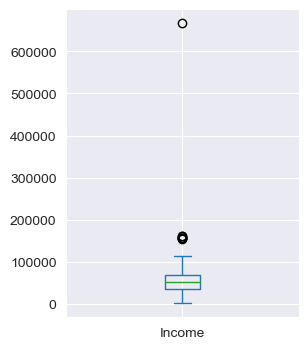

In [34]:
df['Income'].plot(kind='box',figsize=(3,4))

Adding median values to help skewing of the mean due to outliers

In [35]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [36]:
df_columns_to_plot= df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])

Looking at the data as a whole to spot check for any additional outliers

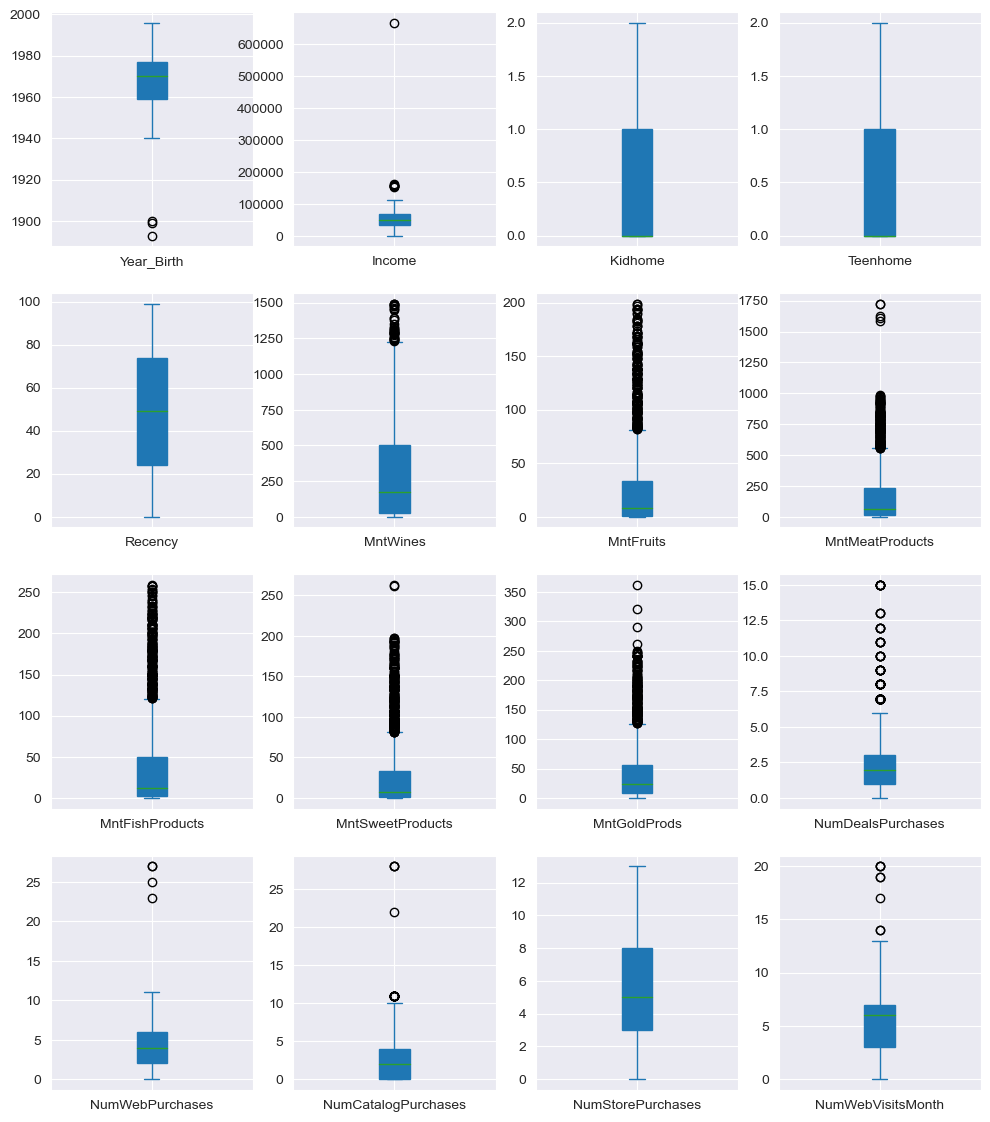

In [37]:
df_columns_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.show()

Year of Birth Earlier than 1900 is most likely a data error, will remove

<Axes: >

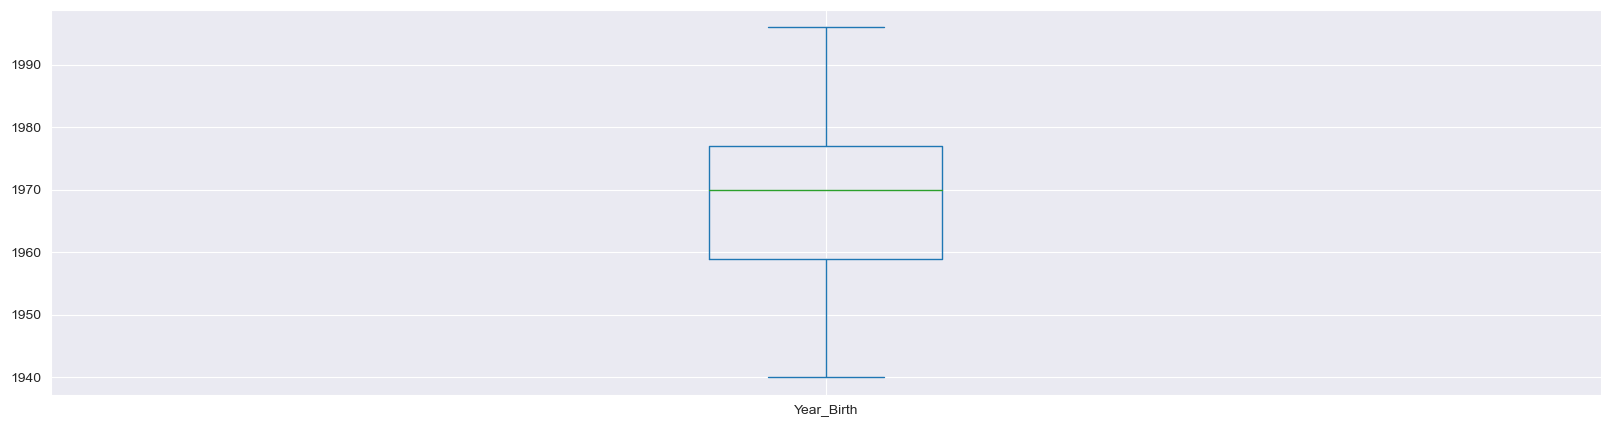

In [38]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)
df['Year_Birth'].plot(kind= 'box')

Removing major income outlier

<Axes: >

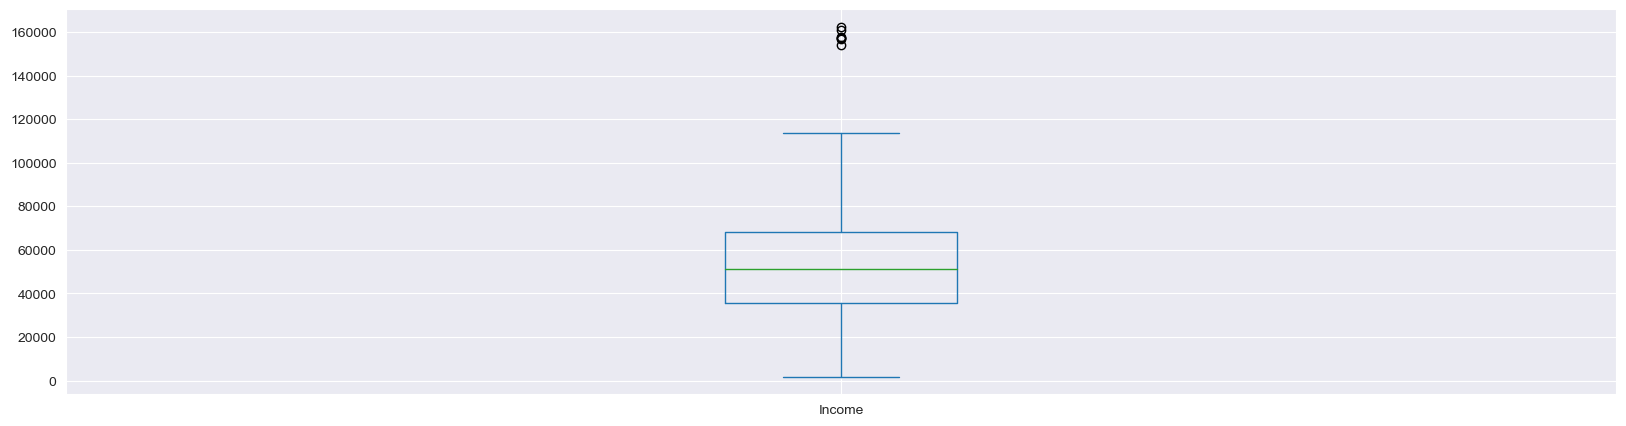

In [39]:
df = df[df['Income'] < 200000].reset_index(drop=True)
df['Income'].plot(kind='box')

## Issues to Explore

Creating groups within the dataset to explore

In [42]:
#Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

#Total Campaigns Accepted
campaigns_cols= [col for col in df.columns if 'Cmp' in col] + ['Response']
df['TotalCampaignsAcc']= df[campaigns_cols].sum(axis=1)

#Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

#Total Purchases
purchase_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchase_cols].sum(axis=1)

Exploring Realtionship Between Total Amount Spent and Income

C:\Users\dpgib\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


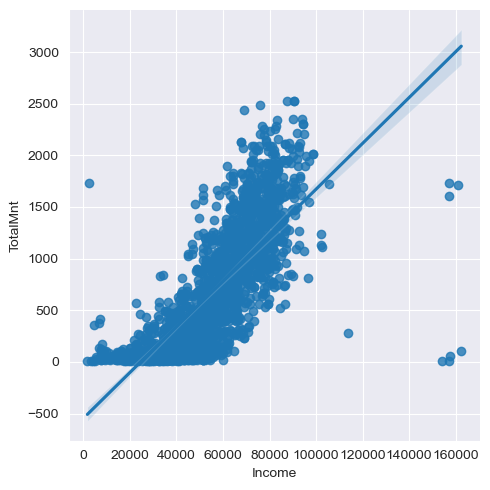

In [45]:

sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000]);


Exploring What Products are Selling the Most Frequently

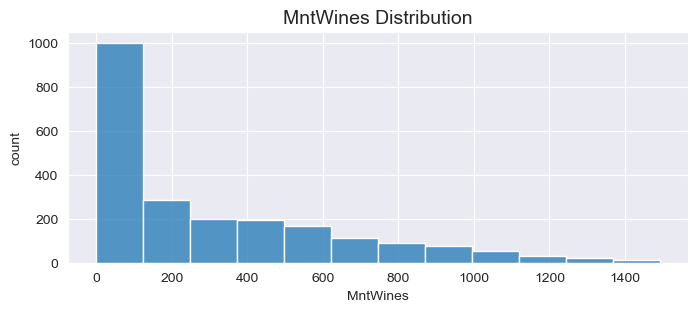

In [21]:
plt.figure(figsize=(8,3))
sns.histplot(df['MntWines'], kde=False, bins=12)
plt.title('MntWines Distribution', size=14)
plt.ylabel('count');

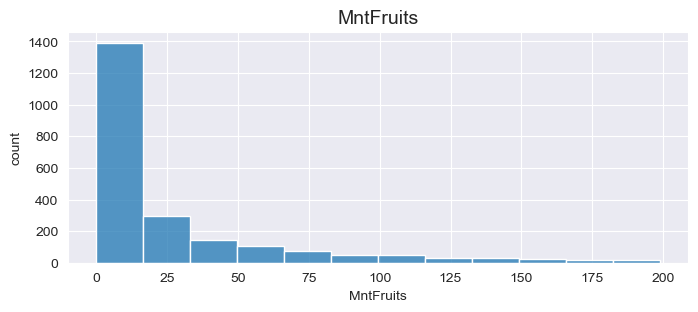

In [47]:
plt.figure(figsize=(8,3))
sns.histplot(df['MntFruits'], kde=False, bins=12)
plt.title('MntFruits', size=14)
plt.ylabel('count');

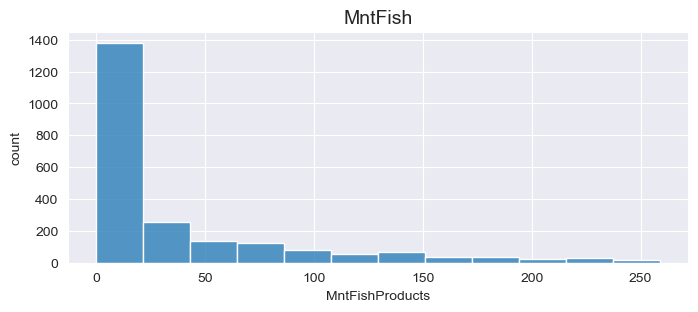

In [48]:
plt.figure(figsize=(8,3))
sns.histplot(df['MntFishProducts'], kde=False, bins=12)
plt.title('MntFish', size=14)
plt.ylabel('count');

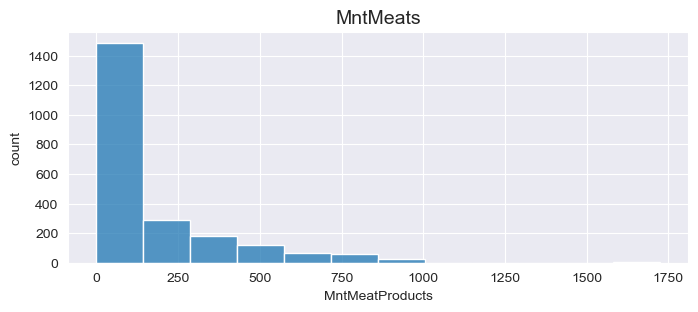

In [50]:
plt.figure(figsize=(8,3))
sns.histplot(df['MntMeatProducts'], kde=False, bins=12)
plt.title('MntMeats', size=14)
plt.ylabel('count');

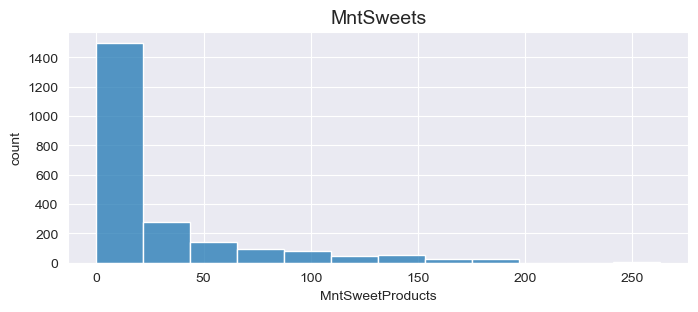

In [51]:
plt.figure(figsize=(8,3))
sns.histplot(df['MntSweetProducts'], kde=False, bins=12)
plt.title('MntSweets', size=14)
plt.ylabel('count');

Wine is by far our best selling product

## Insight

Those without dependents in the home are engaging in previous campaigns at a far higher rate than homes with dependents

The more dependents in the home, the less likely for a customer to engage in marketing campaigns

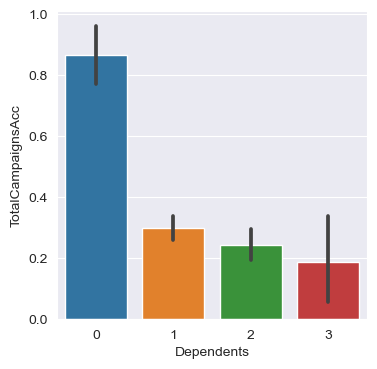

In [42]:
plt.figure(figsize=(4,4))
sns.barplot(x='Dependents', y='TotalCampaignsAcc', data=df);

The higher the household income, the more total number of campaigns accepted increases.

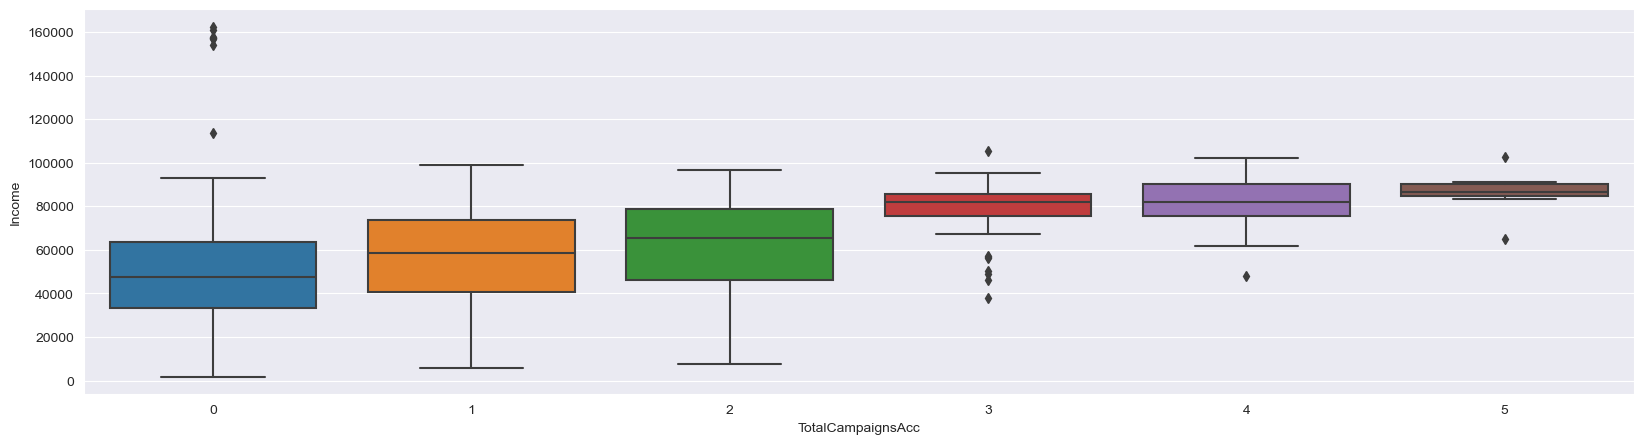

In [50]:
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000]);

As the total spent on wine increases the more total number of campaigns accepted also increases.

<Axes: xlabel='TotalCampaignsAcc', ylabel='MntWines'>

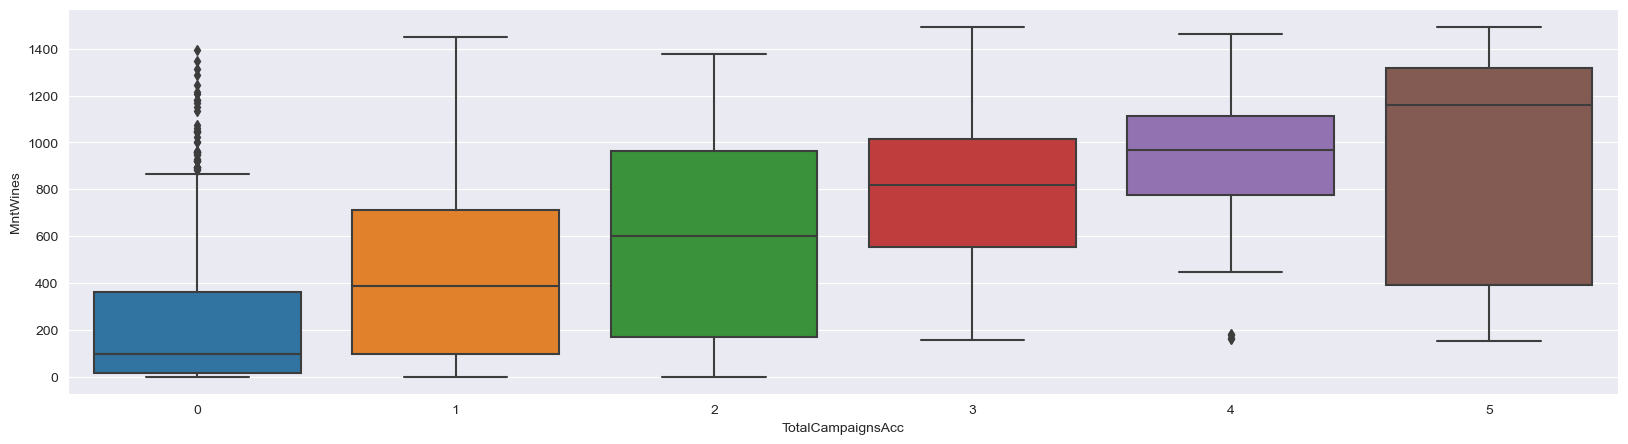

In [60]:
sns.boxplot(x='TotalCampaignsAcc', y='MntWines',data=df)